# 回归

In [1]:
import pathlib, matplotlib.pyplot as plt, pandas as pd, seaborn as sns, tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

/home/rock/WorkSpace/venv/ml/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/rock/WorkSpace/venv/ml/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/rock/WorkSpace/venv/ml/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/rock/WorkSpace/venv/ml/lib/python3.7/site-packages/tensorf

导入数据集

In [2]:
dataset_path = keras.utils.get_file('auto-mpg.data', 'http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data')
dataset_path

32768/30286 [================================] - 0s 13us/step


'/home/rock/.keras/datasets/auto-mpg.data'

In [29]:
column_names = ['MPG', '气缸', '排量', '马力', '重量',
               '加速', '型号年份', '来源']
raw_dataset = pd.read_csv(dataset_path, names=column_names, na_values='?',
                         comment='\t', sep=' ', skipinitialspace=True)

dataset = raw_dataset.copy()
dataset.tail()

,MPG,气缸,排量,马力,重量,加速,型号年份,来源
393,27.0,4,140.0,86.0,2790.0,15.6,82,1
394,44.0,4,97.0,52.0,2130.0,24.6,82,2
395,32.0,4,135.0,84.0,2295.0,11.6,82,1
396,28.0,4,120.0,79.0,2625.0,18.6,82,1
397,31.0,4,119.0,82.0,2720.0,19.4,82,1


处理数据

In [30]:
dataset.isna().sum()

MPG     0
气缸      0
排量      0
马力      6
重量      0
加速      0
型号年份    0
来源      0
dtype: int64

In [31]:
dataset = dataset.dropna()

In [32]:
origin = dataset.pop('来源')

In [33]:
dataset['美国'] = (origin == 1) * 1.0
dataset['欧洲'] = (origin == 2) * 1.0
dataset['日本'] = (origin == 3) * 1.0

dataset.tail()

,MPG,气缸,排量,马力,重量,加速,型号年份,美国,欧洲,日本
393,27.0,4,140.0,86.0,2790.0,15.6,82,1.0,0.0,0.0
394,44.0,4,97.0,52.0,2130.0,24.6,82,0.0,1.0,0.0
395,32.0,4,135.0,84.0,2295.0,11.6,82,1.0,0.0,0.0
396,28.0,4,120.0,79.0,2625.0,18.6,82,1.0,0.0,0.0
397,31.0,4,119.0,82.0,2720.0,19.4,82,1.0,0.0,0.0


拆分数据

In [44]:
train_dataset = dataset.sample(frac=0.8, random_state=0)
test_dataset = dataset.drop(train_dataset.index)

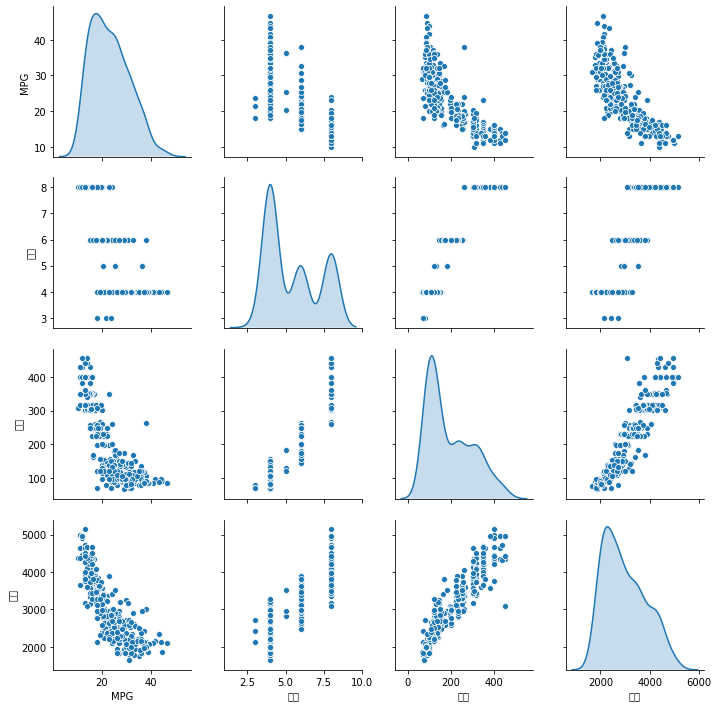

In [36]:
sns.pairplot(train_dataset[['MPG', '气缸', '排量', '重量']], diag_kind='kde')
plt.show()

In [45]:
train_stats = train_dataset.describe()
train_stats.pop('MPG')
train_stats = train_stats.transpose()
train_stats

,count,mean,std,min,25%,50%,75%,max
气缸,314.0,5.477707,1.699788,3.0,4.00,4.0,8.00,8.0
排量,314.0,195.318471,104.331589,68.0,105.50,151.0,265.75,455.0
马力,314.0,104.869427,38.096214,46.0,76.25,94.5,128.00,225.0
重量,314.0,2990.251592,843.898596,1649.0,2256.50,2822.5,3608.00,5140.0
加速,314.0,15.559236,2.789230,8.0,13.80,15.5,17.20,24.8
型号年份,314.0,75.898089,3.675642,70.0,73.00,76.0,79.00,82.0
美国,314.0,0.624204,0.485101,0.0,0.00,1.0,1.00,1.0
欧洲,314.0,0.178344,0.383413,0.0,0.00,0.0,0.00,1.0
日本,314.0,0.197452,0.398712,0.0,0.00,0.0,0.00,1.0


In [46]:
train_labels = train_dataset.pop('MPG')
test_labels = test_dataset.pop('MPG')

规范数据

In [47]:
def norm(x):
    return (x - train_stats['mean']) / train_stats['std']
normed_train_data = norm(train_dataset)
normed_test_data = norm(test_dataset)

建立模型

In [50]:
def build_model():
    model = keras.Sequential([
        layers.Dense(64, activation=tf.nn.relu, input_shape=[len(train_dataset.keys())]),
        layers.Dense(64, activation=tf.nn.relu),
        layers.Dense(1)
    ])
    
    optimizer = keras.optimizers.RMSprop(0.001)
    
    model.compile(loss='mean_squared_error',
                optimizer=optimizer,
                metrics=['mean_absolute_error', 'mean_squared_error'])
    return model

In [51]:
model = build_model()

W0805 15:32:53.362678 140382800832320 deprecation.py:506] From /home/rock/WorkSpace/venv/ml/lib/python3.7/site-packages/tensorflow/python/ops/init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [52]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                640       
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 65        
Total params: 4,865
Trainable params: 4,865
Non-trainable params: 0
_________________________________________________________________


In [53]:
example_batch = normed_train_data[:10]
example_result = model.predict(example_batch)
example_result

array([[-0.18468253],
       [ 0.09675203],
       [ 0.07859351],
       [-0.06265346],
       [-0.5143224 ],
       [-0.0293393 ],
       [-0.5895543 ],
       [-0.66520005],
       [-0.0375457 ],
       [-0.2107501 ]], dtype=float32)

训练模型

In [54]:
class PrintDot(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs):
        if epoch % 100 == 0:
            print('')
        print('.', end='')
        
EPOCHS = 1000

history = model.fit(normed_train_data, train_labels,
                   epochs=EPOCHS, validation_split=0.2,
                   verbose=0, callbacks=[PrintDot()])


....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
..........................................................................................

In [55]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,mean_absolute_error,mean_squared_error,val_loss,val_mean_absolute_error,val_mean_squared_error,epoch
995,2.417251,0.996356,2.417251,9.920356,2.467541,9.920356,995
996,2.322483,0.939602,2.322483,9.002010,2.347751,9.002010,996
997,2.277684,0.938308,2.277684,9.253300,2.343494,9.253300,997
998,2.485755,0.965926,2.485755,9.286464,2.380534,9.286464,998
999,2.389937,0.975707,2.389936,9.305205,2.344322,9.305204,999


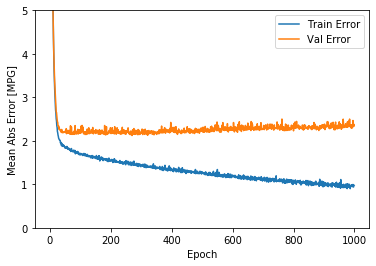

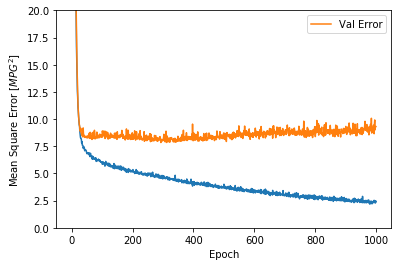

In [59]:
def plot_history(history):
    hist = pd.DataFrame(history.history)
    hist['epoch'] = history.epoch
    
    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('Mean Abs Error [MPG]')
    plt.plot(hist['epoch'], hist['mean_absolute_error'], label='Train Error')
    plt.plot(hist['epoch'], hist['val_mean_absolute_error'], label='Val Error')
    plt.ylim([0, 5])
    plt.legend()
    
    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('Mean Square Error [$MPG^2$]')
    plt.plot(hist['epoch'], hist['mean_squared_error'])
    plt.plot(hist['epoch'], hist['val_mean_squared_error'], label='Val Error')
    plt.ylim([0, 20])
    plt.legend()
    plt.show()
    
plot_history(history)


.................................................

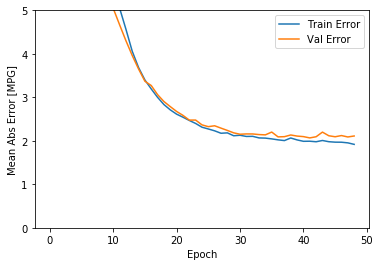

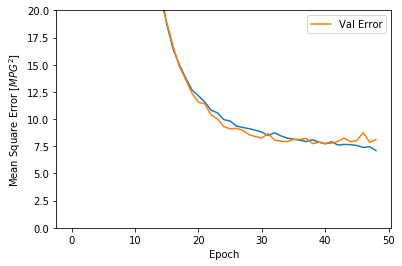

In [60]:
model = build_model()

early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

history = model.fit(normed_train_data, train_labels, epochs=EPOCHS, validation_split=0.2,
                   verbose=0, callbacks=[early_stop, PrintDot()])

plot_history(history)